## INNHOTELSGROUP PROJECT

Objective - The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds

In [14]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Library to split data
from sklearn.model_selection import train_test_split
# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# To tune different models
from sklearn.model_selection import GridSearchCV
# To get diferent metric scores
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score,confusion_matrix,make_scorer

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
#Load the dataset
Data=pd.read_csv('INNHotelsGroup.csv')

In [17]:
Data1=Data.copy()

In [18]:
Data1

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [19]:
#Since the booking ID seems to be a repetetive since we already have the index there, hence, it should be okay to drop the coloumn of the booking ID
Data1=Data1.drop('Booking_ID', axis =1)

In [20]:
Data1

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [21]:
Data1.shape

(36275, 18)

Our data has 36275 rows and 18 columns 

In [22]:
Data1.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


 Use describe to see information on the data
 36275 counts for all the features
 No. of adults feature has a mean value of 1.844 
 No. of children has a mean of 0.105
 No of weekend nights has a mean value of 0.8
 No. of required car parking space has a mean of 0.17
 Lead time has a high mean of 85.23
 Arrival year has a mean of 2017
 Arrival month has a mean of 7.42
 repeated guest has a mean of 0.02
 no of previous cancellations has a mean of 0.02
 No. of previous booking not cancelled has a mean of 0.15
 avg price per room has a mean of 103
 No. of special requests has a mean of 0.6

In [23]:
Data1.head(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [24]:
Data1.tail(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36265,2,0,1,3,Meal Plan 1,0,Room_Type 1,15,2018,5,30,Online,0,0,0,100.73,0,Not_Canceled
36266,2,0,2,2,Meal Plan 1,0,Room_Type 2,8,2018,3,4,Online,0,0,0,85.96,1,Canceled
36267,2,0,1,0,Not Selected,0,Room_Type 1,49,2018,7,11,Online,0,0,0,93.15,0,Canceled
36268,1,0,0,3,Meal Plan 1,0,Room_Type 1,166,2018,11,1,Offline,0,0,0,110.00,0,Canceled
36269,2,2,0,1,Meal Plan 1,0,Room_Type 6,0,2018,10,6,Online,0,0,0,216.00,0,Canceled
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [25]:
Data1.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

There are no null values in the dataset so we can proceed

In [26]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [27]:
df=Data1.copy()

Lets now do our data exploratory analysis on the various features

##  Perform an Exploratory Data Analysis

In [64]:
#Lets create function Labeled barplot to do Univariate analysis

In [28]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

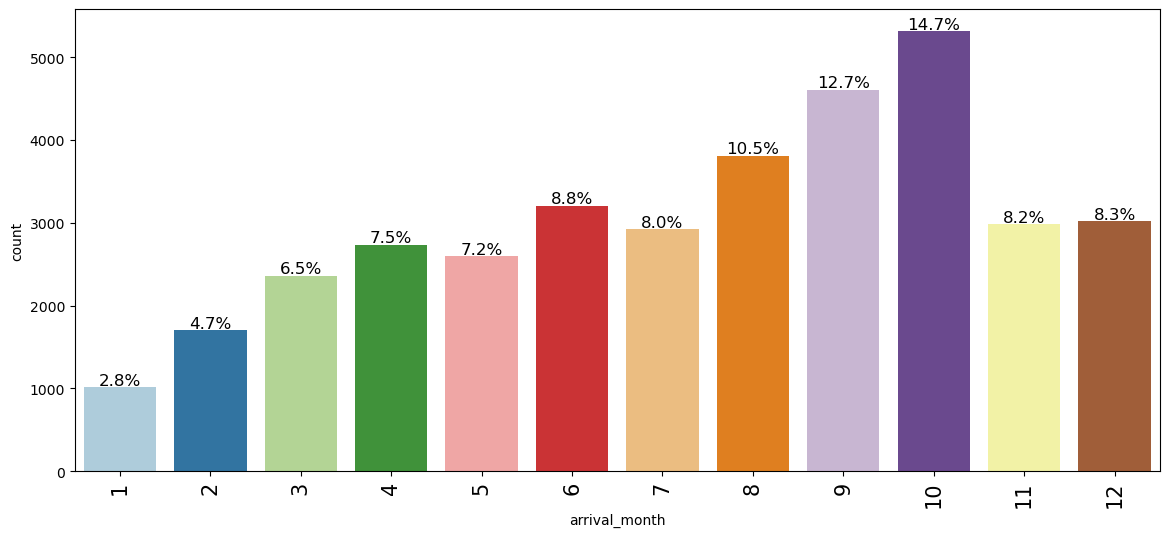

In [29]:
labeled_barplot(df, 'arrival_month', perc=True, n=None)


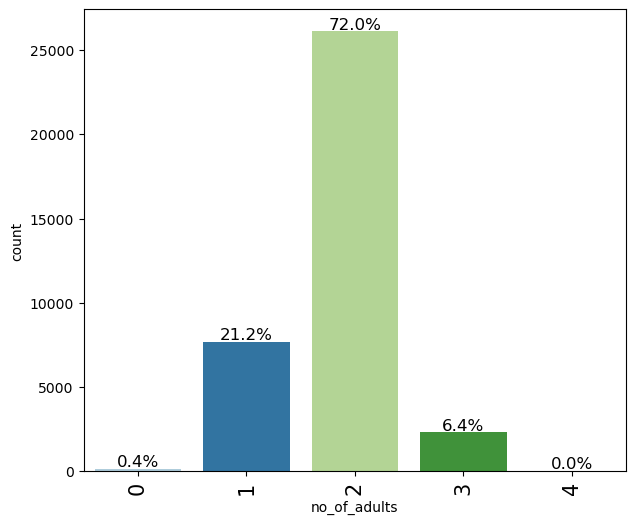

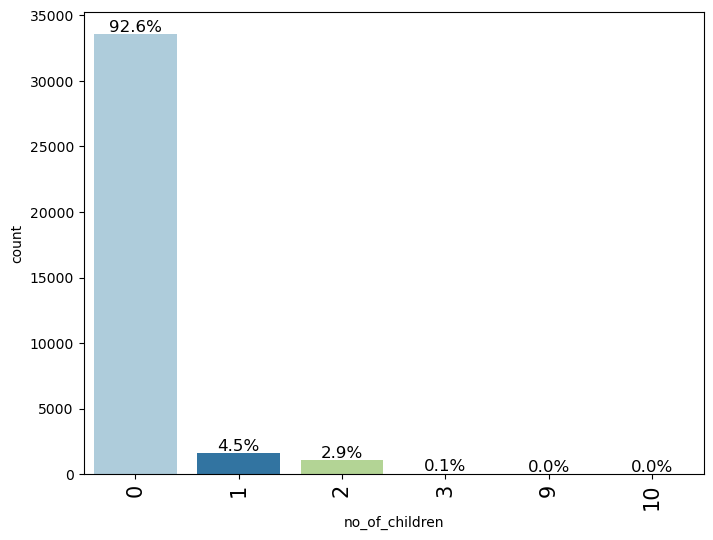

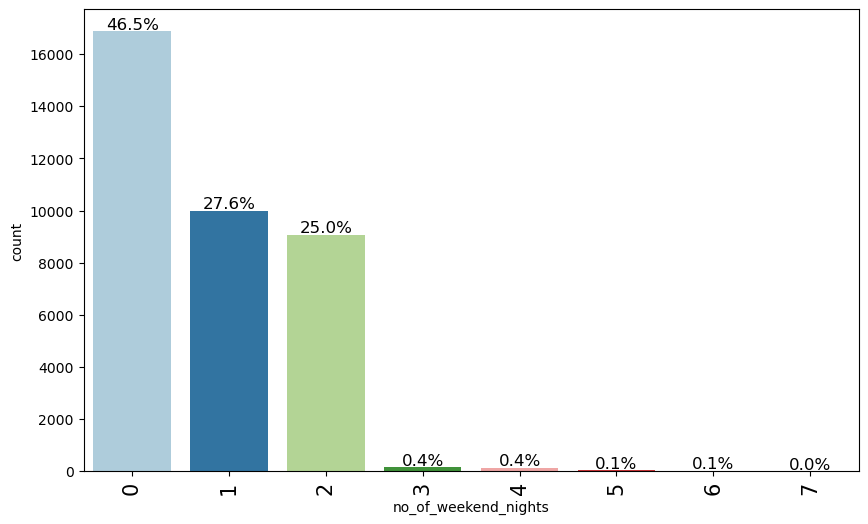

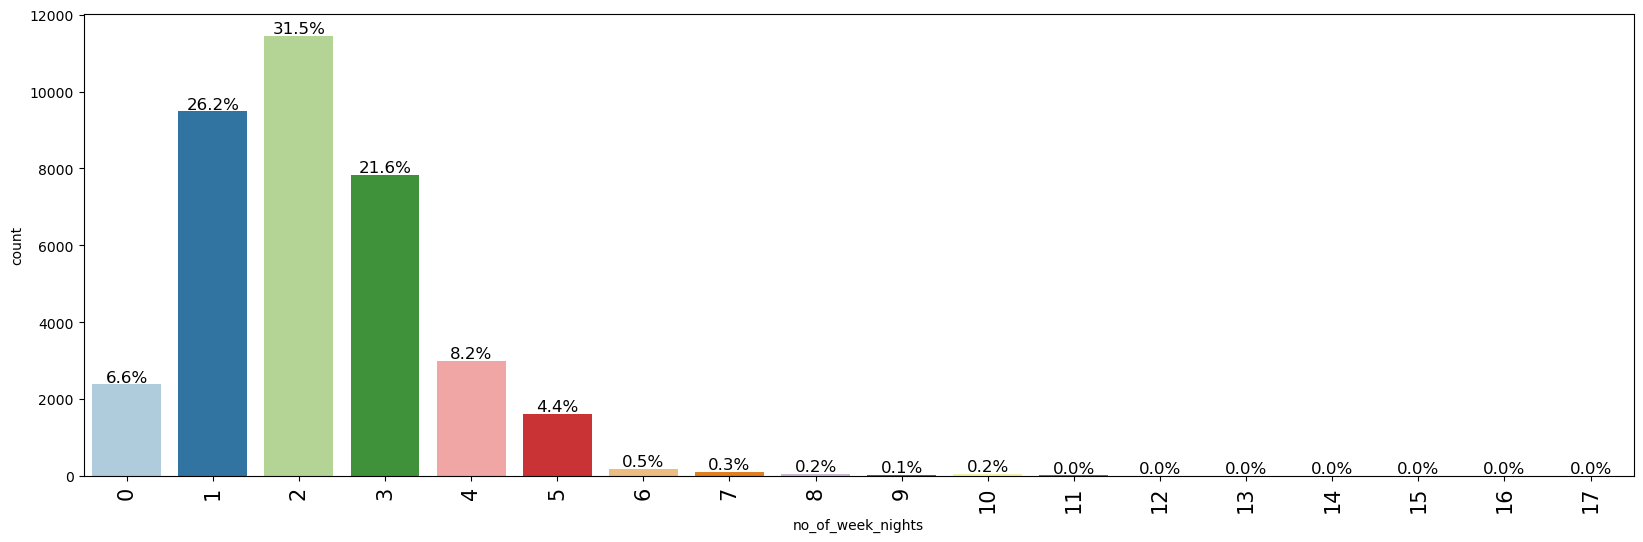

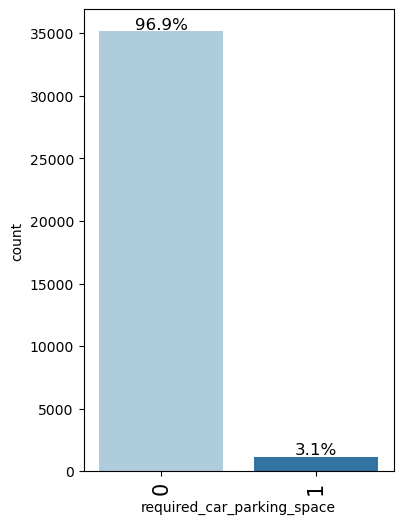

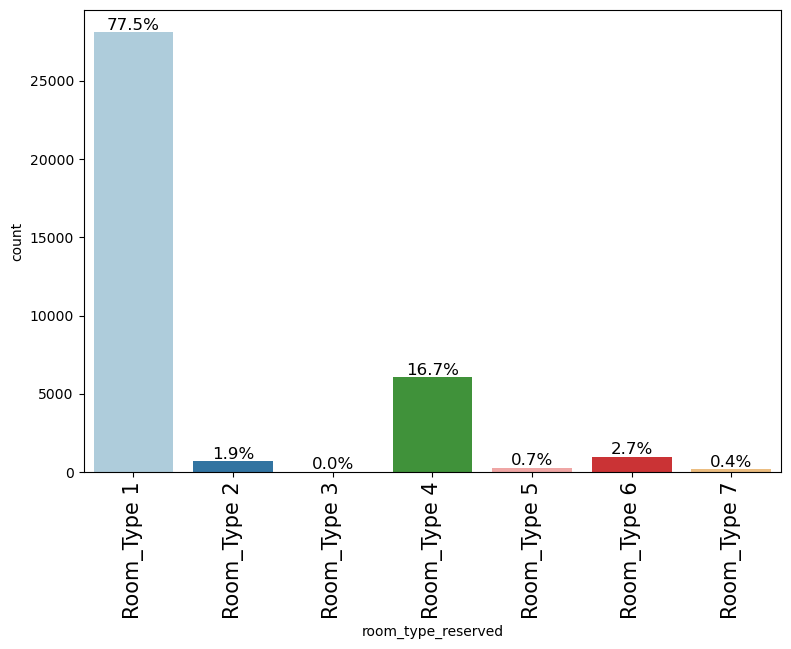

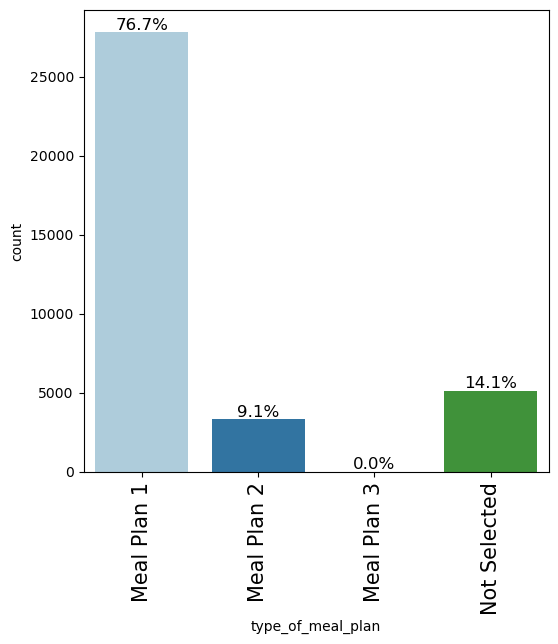

In [63]:
#Plotting barplot for the various features in the dataset
labeled_barplot(df, 'no_of_adults', perc=True)
#72% of people book for two adults
labeled_barplot(df, 'no_of_children', perc=True)
#Data shows majority almost 92% of guests arrive without children
labeled_barplot(df, 'no_of_weekend_nights', perc=True)
#Most of the bookings are made on weekday 46.5%
labeled_barplot(df, 'no_of_week_nights', perc=True)
#Most guest book for 2 week nights-31.5%
labeled_barplot(df, 'required_car_parking_space', perc=True)
#Most of the guest do not require a parking space- 96.9%
labeled_barplot(df, 'room_type_reserved', perc=True)
#Room_tyoe 1 is most booked. This is encoded by the hotel so we dont know what different room types mean. 
labeled_barplot(df, 'type_of_meal_plan', perc=True)
#Similarly, meal plan 1 is most booked but it is encoded by the hotel

In [31]:
#Highest number of guests around 14.7% arrive to the hotel in the month of October

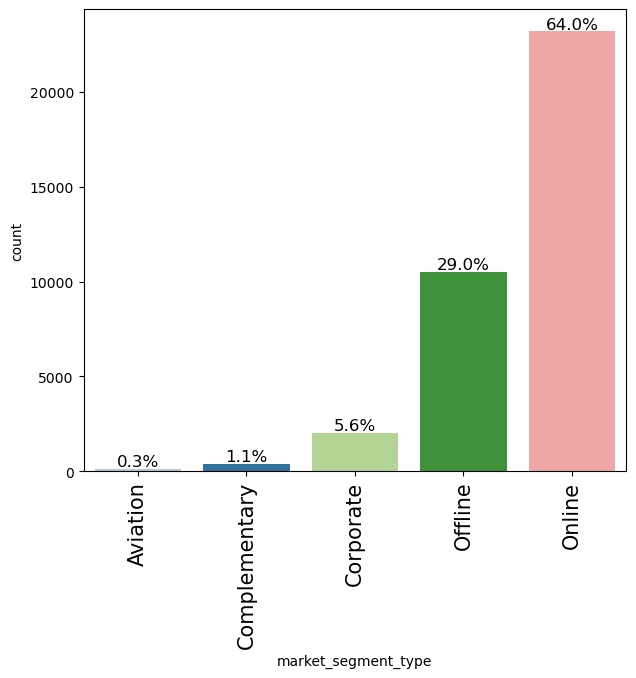

In [32]:
labeled_barplot(df, 'market_segment_type', perc=True, n=None)

In [33]:
#Most of the bookings are made online 64%

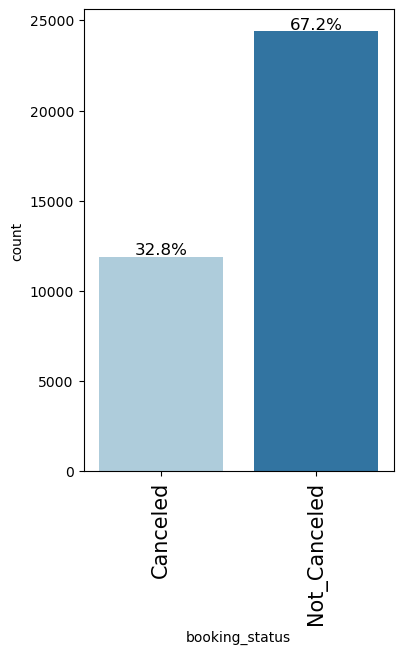

In [34]:
labeled_barplot(df, 'booking_status', perc=True, n=None)

In [35]:
# 32.8% of the bookings were cancelled in the data given

In [36]:

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

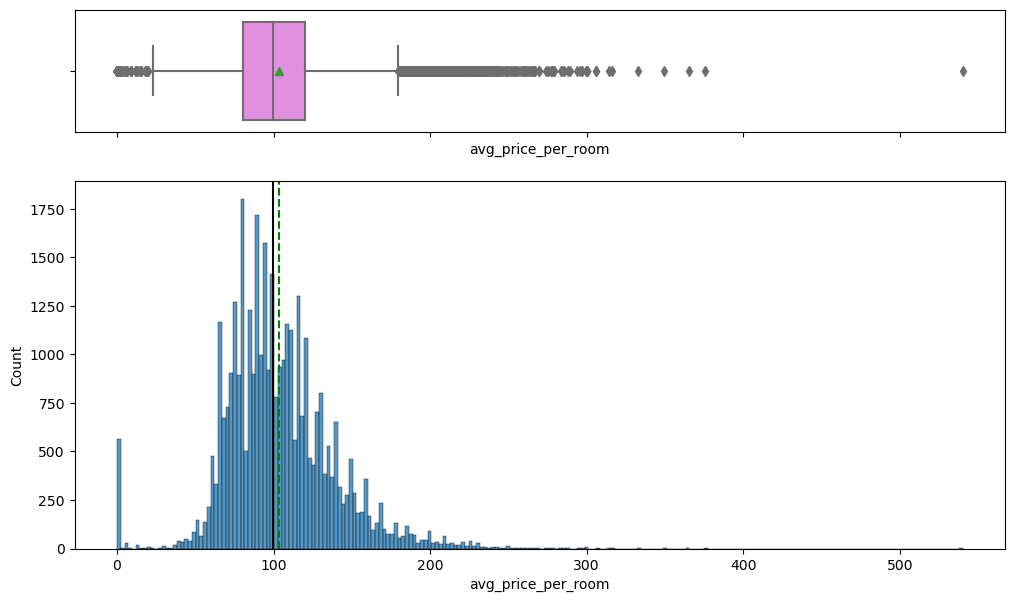

In [37]:
histogram_boxplot(df, 'avg_price_per_room')

In [38]:
# Median average price per room is approx $100. Also, this category has alot of outliers.

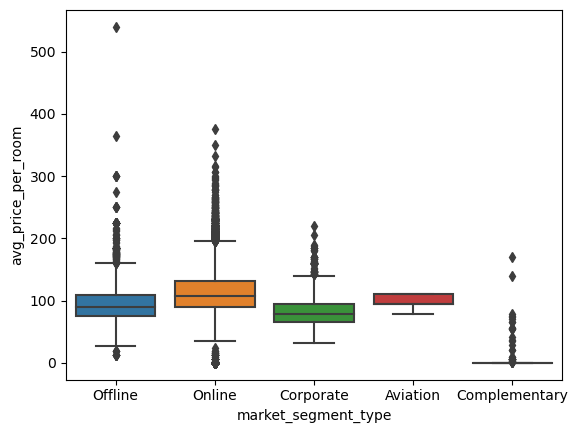

In [39]:
sns.boxplot(data=df, y='avg_price_per_room' , x='market_segment_type');

In [40]:
#Online category has greater median when it comes to market segment type

Creating a function for BI-variate analysis

In [41]:
def stacked_barplot(data, predictor, target, perc=False):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
  
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5,))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [42]:
#Lets run the function created for features repeated guest and booking status

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


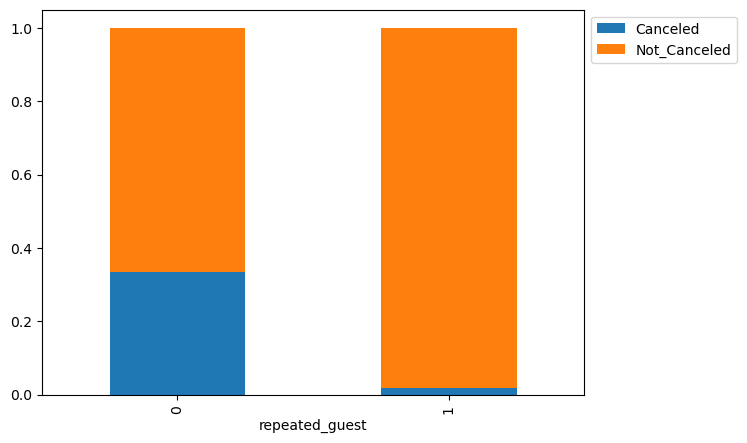

In [43]:
stacked_barplot(df,'repeated_guest','booking_status')

In [44]:
#The cancellation in the case of repeating guest is incredibly low.The possibility of repeating guest cancelling a booking is low.

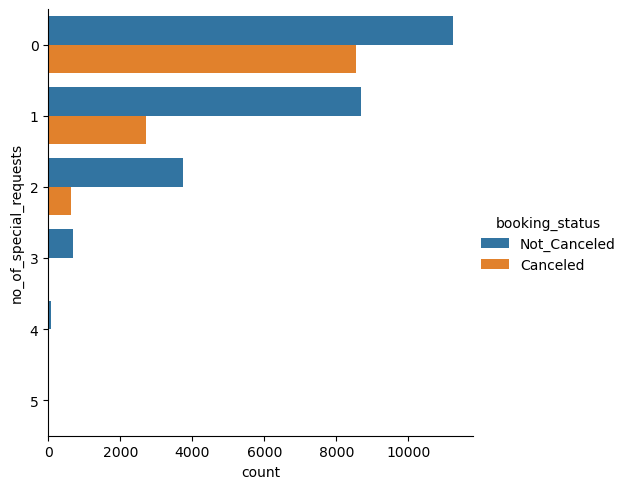

In [45]:
sns.catplot(data=df, y='no_of_special_requests', hue='booking_status', kind='count' )

##Key observations

1. Month 10 = October with 14.7% of the total booking for the year.

2. Online 23214 or 64% of the bookings come via the internet.

3. about 1/3 (11885) of bookings are canceled in the sample data.

4. Repeating guest rarely cancel (1.75%).

5. The absence of special request increases the likelihood of cancellation, the addition of special request begins to reduce the likelihood of cancellation at one and progressively reduces cancellation to Zero on the instance of a third request.



<Axes: >

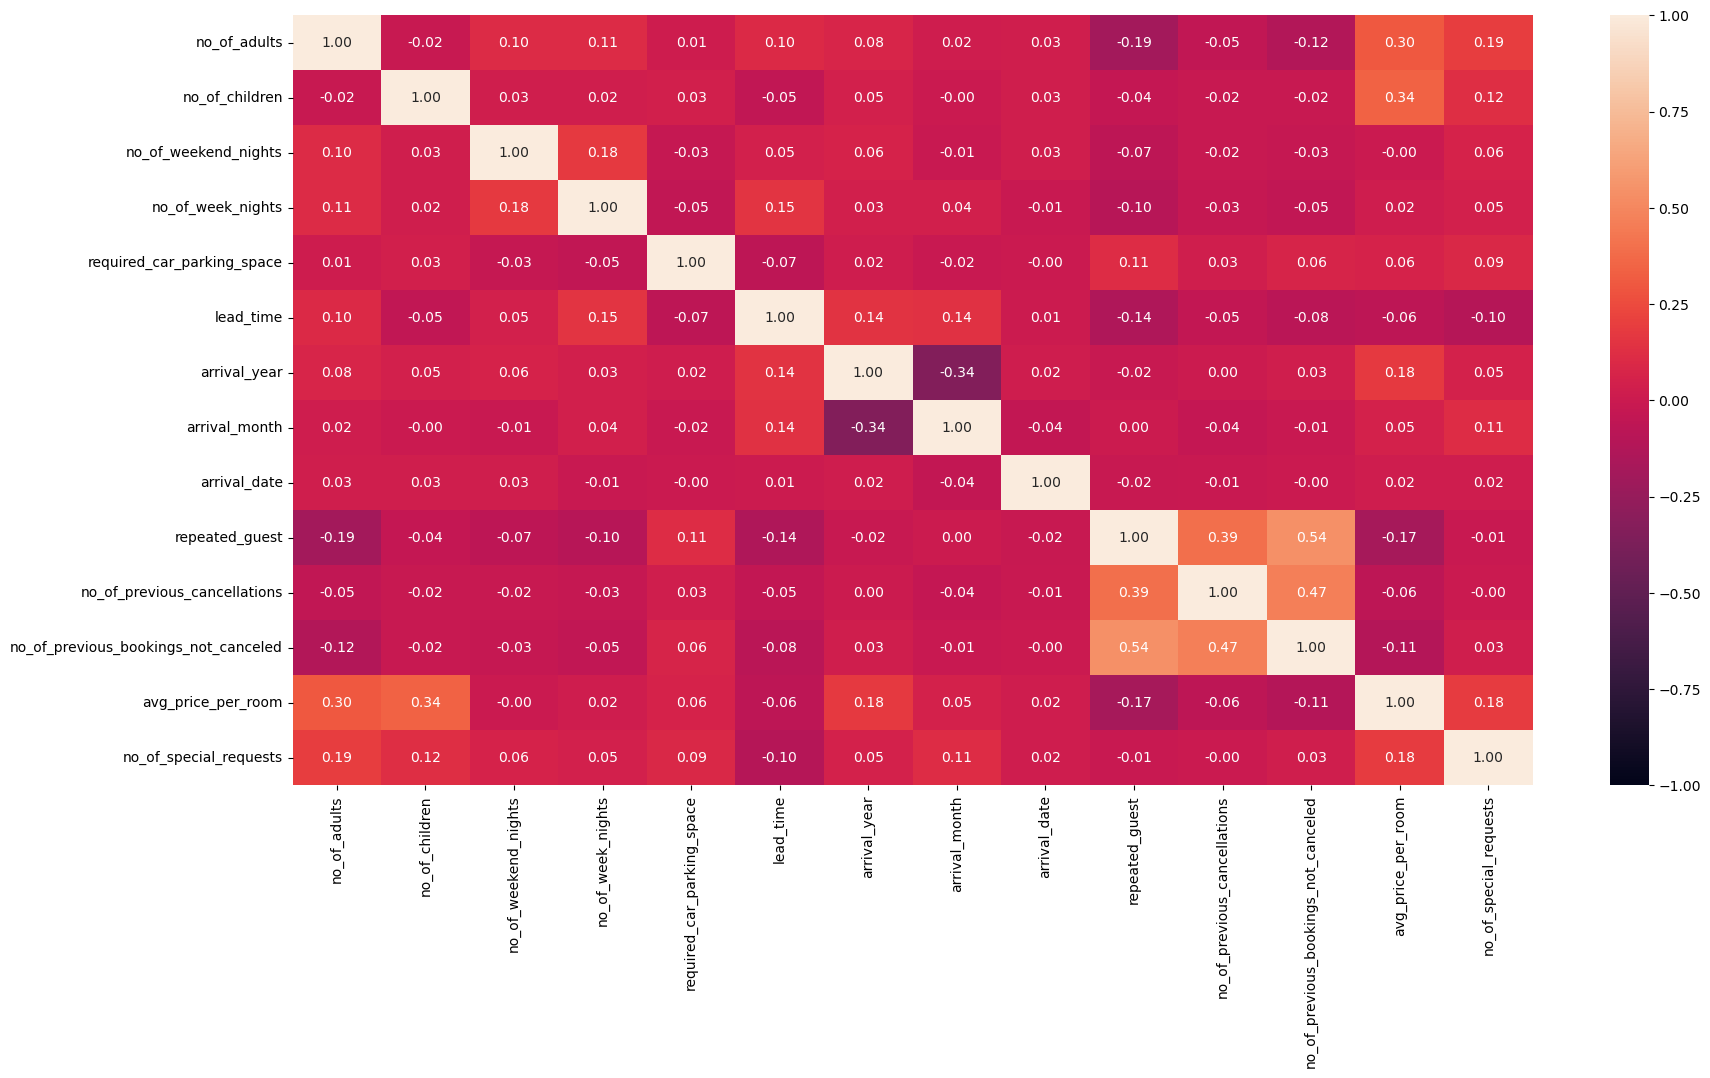

In [46]:
plt.figure(figsize=(20,10))
sns.heatmap(
df.corr(), annot=True, vmin=-1, vmax=1, fmt='.2f')

In [47]:
#repeated_guest has high correlation with no of previous bookings not cancelled. This is also evident in stacked barplot for repeated guest and booking status. No. of adults and no of children have some correlation with the avg price per room as well considering people consider bigger and better rooms if these factors are included. 

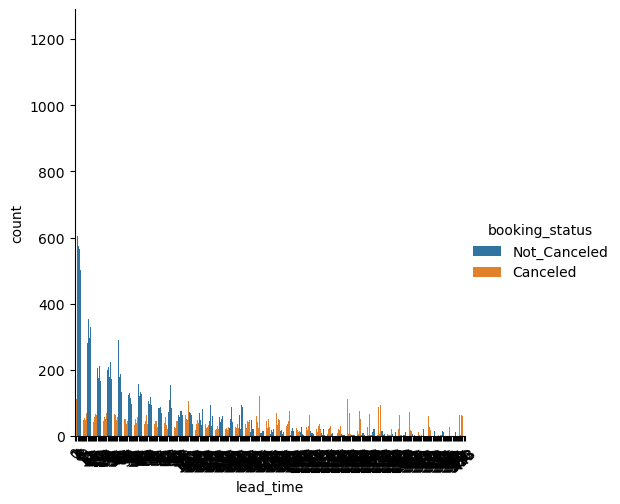

In [48]:
sns.catplot(data=df, x='lead_time', hue='booking_status', kind='count' )
plt.xticks(rotation=45)
plt.show()

In [49]:
#Cancellation are higher as the lead time becomes more

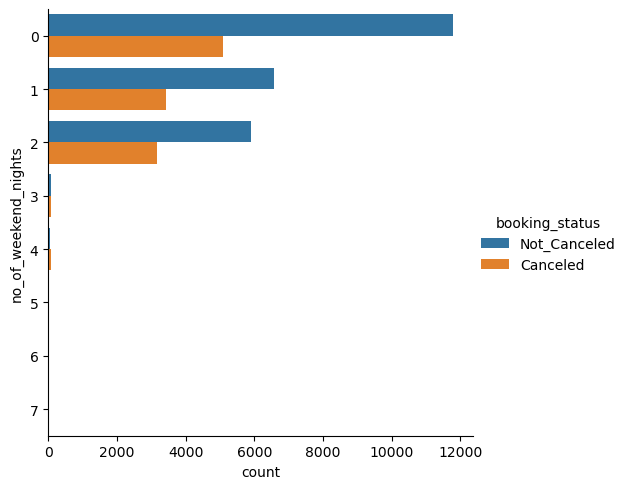

In [50]:
sns.catplot(data=df, y='no_of_weekend_nights', hue='booking_status', kind='count' )
plt.show()

In [51]:
#Cancellations are less when guests book the room for the weekendnight.

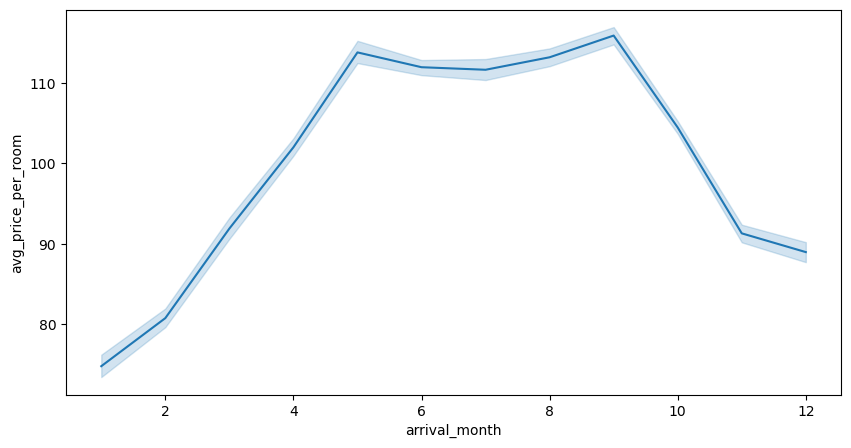

In [52]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='arrival_month', y='avg_price_per_room')
plt.show()

In [53]:
#Avg price per room is highest in the month of october, this makes sense since the month of october also sees the highest number of bookings

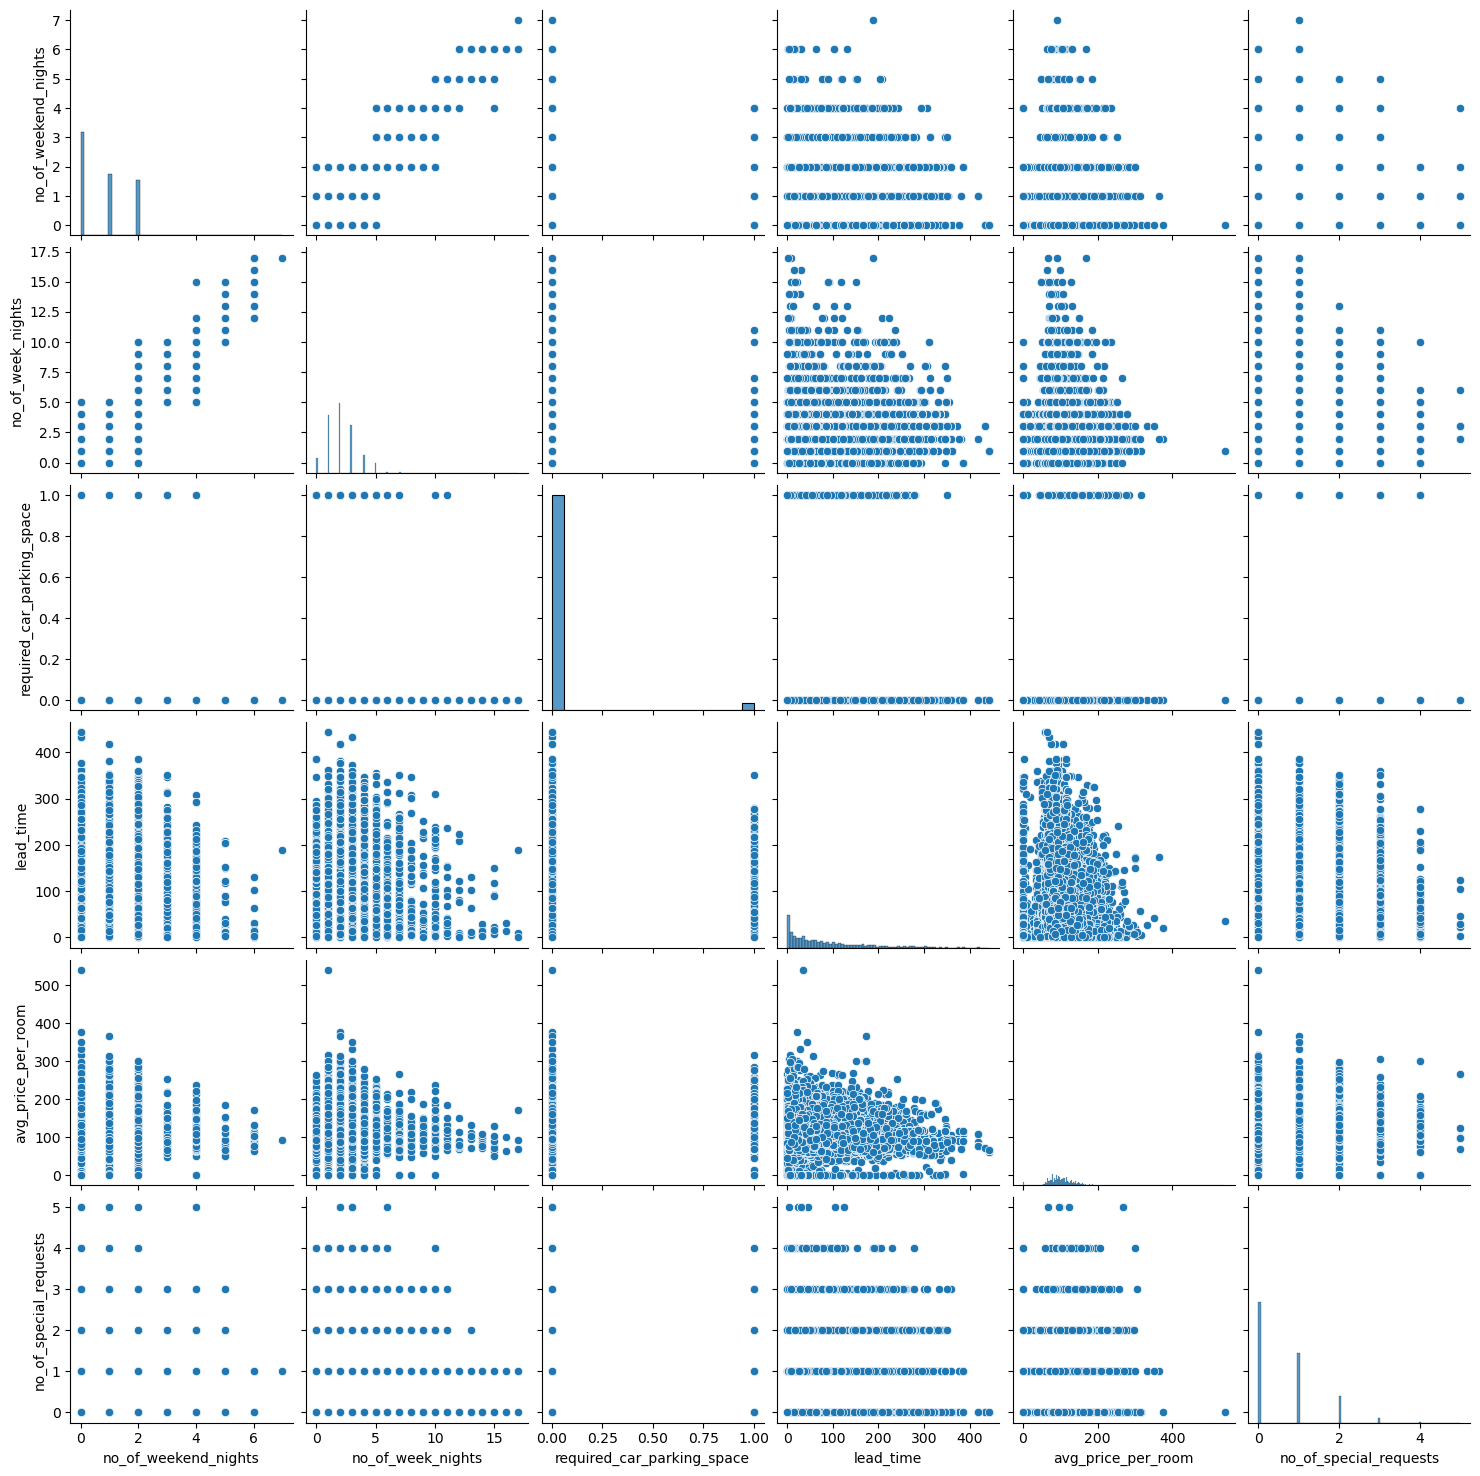

In [54]:
sns.pairplot(df[['no_of_weekend_nights','no_of_week_nights','required_car_parking_space',
                   'lead_time','avg_price_per_room','no_of_special_requests','type_of_meal_plan',
                   'room_type_reserved','market_segment_type','booking_status']]);

In [55]:
#Pairplot plotted for various features in the dataset. 

## Data Preprocessing

In [67]:
#Lets see if the data has any null values
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [68]:
#Merging no of weekend nights and no of week nights in one feature total nights
df['total_nights']=df['no_of_weekend_nights']+df['no_of_week_nights']

In [69]:
#Now dropping both these features
df.drop('no_of_week_nights',axis=1,inplace=True)
df.drop('no_of_weekend_nights',axis=1,inplace=True)

In [70]:
df

,no_of_adults,no_of_children,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_nights
0,2,0,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,3
1,2,0,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,5
2,1,0,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,3
3,2,0,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2
4,2,0,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled,8
36271,2,0,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled,4
36272,2,0,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled,8
36273,2,0,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled,3


In [71]:
#converting object dtypes in category
for col in df.columns[df.dtypes=='object']:

    df[col]=df[col].astype('category')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  int64   
 2   type_of_meal_plan                     36275 non-null  category
 3   required_car_parking_space            36275 non-null  int64   
 4   room_type_reserved                    36275 non-null  category
 5   lead_time                             36275 non-null  int64   
 6   arrival_year                          36275 non-null  int64   
 7   arrival_month                         36275 non-null  int64   
 8   arrival_date                          36275 non-null  int64   
 9   market_segment_type                   36275 non-null  category
 10  repeated_guest                        36275 non-null  int64   
 11  no

In [73]:
#Lets see the outliers and if any treatement is necessary

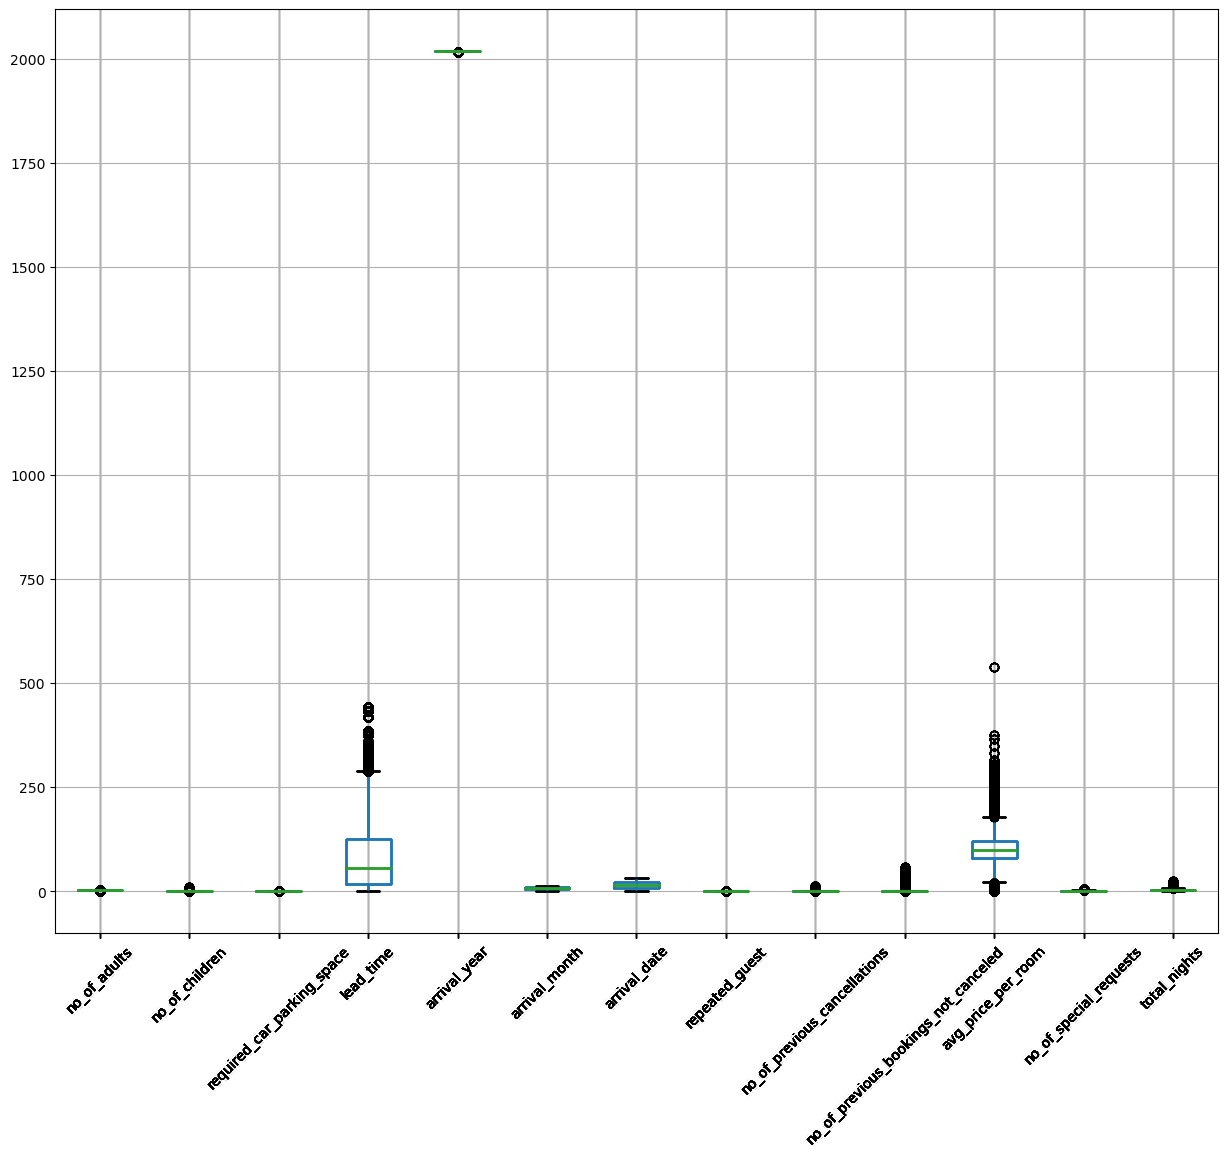

In [74]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# drop column because they were either time, or not helpful
numeric_columns.remove("arrival_year")


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    df.boxplot() 

plt.xticks(rotation=45)
plt.show()
#Lead time and average price per room have the highest number of outliers but I will let them unchanged since it is a part of our dataset.

In [75]:
#Now lets create dummies for type of meal plan, room type reserved, market segment type 
df=pd.get_dummies(df,columns=['type_of_meal_plan','room_type_reserved','market_segment_type'],drop_first=True)

In [76]:
#Converting booking status in 0 and 1 using the lambda function
df["booking_status"] = df["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

Splitting Data

In [83]:
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# adding constant
X = sm.add_constant(X)

# Splitting data in train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [84]:
X_train.shape

(25392, 27)

In [85]:
Y_train.value_counts(normalize=True)

0    0.670644
1    0.329356
Name: booking_status, dtype: float64

In [86]:
#Importing libraries for data model creation for both regression and decision tree 
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

In [88]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

# fitting logistic regression model
logit = sm.Logit(Y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Sat, 23 Sep 2023   Pseudo R-squ.:                  0.3291
Time:                        16:08:39   Log-Likelihood:                -10796.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -925.5354    120.760     -7.664      0.000   -1162.220    -688.851
no_of_adults                             0.1174      

Negative values of the coefficient shows that the probability of a hotel booking being cancelled decreases with the increase of corresponding attribute value.
Positive values of the coefficient show that that probability of a hotel booking being cancelled increases with the increase of corresponding attribute value.

p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant. However, these variables might contain multicollinearity, which will affect the p-values.

We will have to remove multicollinearity from the data to get reliable coefficients and p-values.

In [89]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [90]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, Y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.805254,0.629917,0.740096,0.680576


Checking Multicollinearity
In order to make statistical inferences from a logistic regression model, we must ensure that multicollinearity is not present in the data.
VIF standards:
If VIF is between 1 and 5, then there is low multicollinearity.
If VIF is between 5 and 10, we say there is moderate multicollinearity.
If VIF is exceeding 10, it shows signs of high multicollinearity.

In [91]:
# defining a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [92]:
checking_vif(X_train).sort_values(by='VIF', ascending=False)


,feature,VIF
0,const,3.942783e+07
26,market_segment_type_Online,7.117470e+01
25,market_segment_type_Offline,6.410808e+01
24,market_segment_type_Corporate,1.692491e+01
23,market_segment_type_Complementary,4.497880e+00
11,avg_price_per_room,2.047089e+00
2,no_of_children,1.978178e+00
21,room_type_reserved_Room_Type 6,1.973003e+00
8,repeated_guest,1.783347e+00
10,no_of_previous_bookings_not_canceled,1.651869e+00


#except  few dummy variables, no other features show a VIF more than 5
The above predictors have no multicollinearity and the assumption is satisfied.


In [93]:
# running a loop to drop variables with high p-value

# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(Y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'total_nights', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [94]:
X_train2 = X_train[selected_features]

In [95]:
logit2 = sm.Logit(Y_train, X_train2.astype(float))
lg2 = logit2.fit(disp=False)
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25371
Method:                           MLE   Df Model:                           20
Date:                Sat, 23 Sep 2023   Pseudo R-squ.:                  0.3281
Time:                        16:09:00   Log-Likelihood:                -10812.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -918.0852    120.399     -7.625      0.000   -1154.062    -682.108
no_of_adults                       0.1125      0.037      3.020      0.

Now no feature has p-value greater than 0.05, so we'll consider the features in X_train2 as the final ones and lg2 as final model.

Coefficient interpretations
Coefficients for the number of adults, the lead time prior to a booking, the arrival year (i.e., 2018 v. 2017), the number of previous cancellations, the average room price, the total nights booked, selecting Meal Plan 2, and not selecting a meal plan are all positive, meaning an increase in these will lead to increase in chances of a hotel booking being cancelled.

Coefficients for requiring a parking space, arrival month, being a repeat guest, the number of special requests, and the market segments for Corporate and Offline are all negative, meaning an increase in these will lead to decrease in chances of a hotel booking being cancelled.

Checking model performance on the training set


In [96]:
log_reg_model_train_perf = model_performance_classification_statsmodels(lg2, X_train2, Y_train)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.805529,0.630755,0.740351,0.681173


Conclusions
We were able to build a predictive model that can be used by INN Hotels to predict which bookings will be canceled with an F1 score of 0.70 on the training set.

All the logistic regression models have given a generalized performance on both the training and test set, indicating this model should perform similarly for INN Hotels in production.

Coefficients for the number of adults, the lead time prior to a booking, the arrival year (i.e., 2018 v. 2017), the number of previous cancellations, the average room price, the total nights booked, selecting Meal Plan 2, and not selecting a meal plan are all positive, meaning an increase in these will lead to increase in chances of a hotel booking being cancelled.

Coefficients for requiring a parking space, arrival month, being a repeat guest, the number of special requests, and the market segments for Corporate and Offline are all negative, meaning an increase in these will lead to decrease in chances of a hotel booking being cancelled.

Decision Tree models


Check model performance on the test set


In [97]:
#dropping the columns from the test set that were dropped from the training set
X_test2 = X_test[list(X_train2.columns)]

In [98]:
log_reg_model_test_perf = model_performance_classification_statsmodels(lg2, X_test2, Y_test)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.803731,0.627768,0.728261,0.674291


Conclusions
We were able to build a predictive model that can be used by INN Hotels to predict which bookings will be canceled with an F1 score of 0.70 on the training set.

All the logistic regression models have given a generalized performance on both the training and test set, indicating this model should perform similarly for INN Hotels in production.

Coefficients for the number of adults, the lead time prior to a booking, the arrival year (i.e., 2018 v. 2017), the number of previous cancellations, the average room price, the total nights booked, selecting Meal Plan 2, and not selecting a meal plan are all positive, meaning an increase in these will lead to increase in chances of a hotel booking being cancelled.

Coefficients for requiring a parking space, arrival month, being a repeat guest, the number of special requests, and the market segments for Corporate and Offline are all negative, meaning an increase in these will lead to decrease in chances of a hotel booking being cancelled.

## Decision Tree models

In [99]:
#resplit data for the decision tree model
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

#create dummy variables
X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [100]:
X_train.head()

,no_of_adults,no_of_children,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
13662,1,0,0,163,2018,10,15,0,0,0,...,0,0,0,0,0,0,0,0,1,0
26641,2,0,0,113,2018,3,31,0,0,0,...,1,0,0,0,0,0,0,0,0,1
17835,2,0,0,359,2018,10,14,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21485,2,0,0,136,2018,6,29,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5670,2,0,0,21,2018,8,15,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [101]:
#confirm percentage of each class in both training and test datasets
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print(' ')
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.670644
1    0.329356
Name: booking_status, dtype: float64
 
Percentage of classes in test set:
0    0.676376
1    0.323624
Name: booking_status, dtype: float64


In [102]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="", cmap='viridis')
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

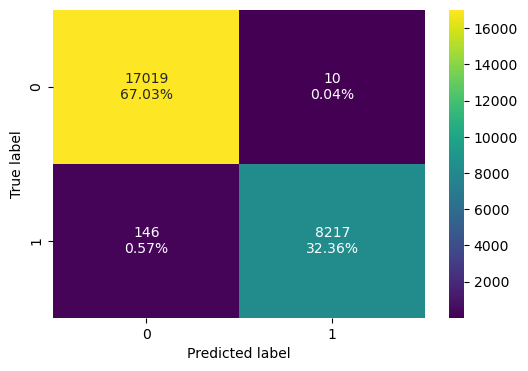

In [103]:
#build the decision tree model
dtree = DecisionTreeClassifier(criterion="gini", class_weight={0: 0.67, 1: 0.33}, random_state=1)
#fit the model to the training set
dtree.fit(X_train, y_train)
#create a confusion matrix
confusion_matrix_sklearn(dtree, X_train, y_train)

In [104]:
##  Function to calculate f1 score
def get_f1_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return f1_score(target, prediction)

In [105]:
decision_tree_perf_train = get_f1_score(dtree, X_train, y_train)

print("F1 Score:", decision_tree_perf_train)

F1 Score: 0.9905967450271249


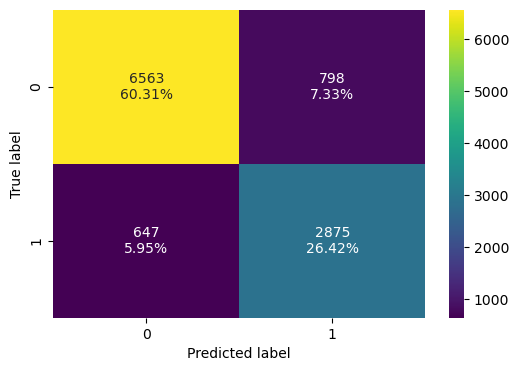

In [106]:
confusion_matrix_sklearn(dtree, X_test, y_test)

In [107]:
decision_tree_perf_test = get_f1_score(dtree, X_test, y_test)
print("F1 Score:", decision_tree_perf_test)

F1 Score: 0.7991660875608062


There is a significant difference in the performance of the model on the training set and the test set, which suggests that the model is overfiiting.


Visualizing the Decision Tree


In [108]:
## creating a list of column names
feature_names = X_train.columns.to_list()

In [109]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dtree, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- total_nights <= 5.50
|   |   |   |   |   |   |--- lead_time <= 74.50
|   |   |   |   |   |   |   |--- arrival_month <= 5.50
|   |   |   |   |   |   |   |   |--- arrival_date <= 27.50
|   |   |   |   |   |   |   |   |   |--- lead_time <= 59.50
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 16
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Offline >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |--- lead_time >  59.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 138.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   

The tree above is very complex and difficult to interpret.


In [110]:
#Print the top-10 most important features in the decision tree 
#The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature

print(pd.DataFrame(dtree.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(
    by="Imp", ascending=False).head(n=10))

                                     Imp
lead_time                       0.339168
avg_price_per_room              0.214379
arrival_date                    0.097996
market_segment_type_Online      0.081985
arrival_month                   0.072094
total_nights                    0.059234
no_of_special_requests          0.050166
no_of_adults                    0.030213
arrival_year                    0.010049
type_of_meal_plan_Not Selected  0.009498


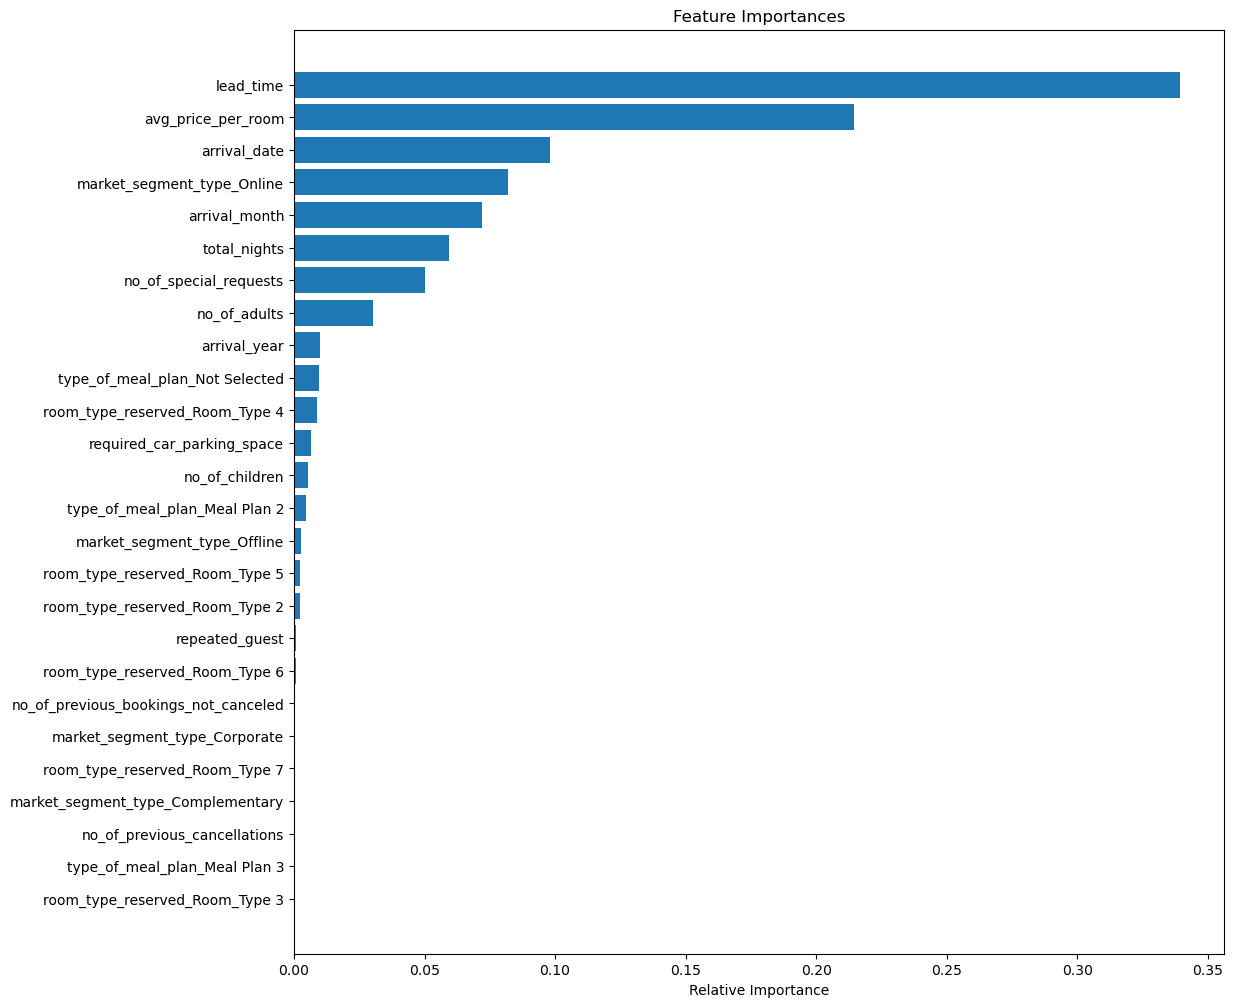

In [111]:
#visualization of feature importance
importances = dtree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

According to the decision tree model, lead_time and avg_price_per_room are the two most important variables for predicting a booking's cancellation by a factor of 3 and 2, respectively, over the third most important variable, arrival_date.


## Decision Tree pruning


GridSearch for hyperparameter tuning


Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [112]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.67, 1: 0.33})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33},
                       min_impurity_decrease=1e-05, random_state=1)

Checking performance on training set


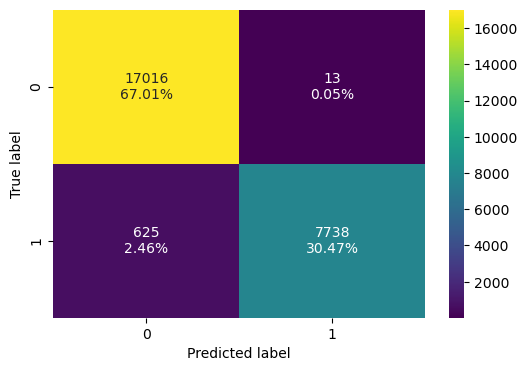

In [113]:
confusion_matrix_sklearn(estimator, X_train, y_train)


In [114]:
decision_tree_tune_perf_train = get_f1_score(estimator, X_train, y_train)
print("F1 Score:", decision_tree_tune_perf_train)

F1 Score: 0.9604070994166563


Checking performance on test set


In [115]:
decision_tree_tune_perf_test = get_f1_score(estimator, X_test, y_test)
print("F1 Score:", decision_tree_tune_perf_test)

F1 Score: 0.8104575163398693


The model still appears overfitted to the training data


Visualizing the Decision Tree


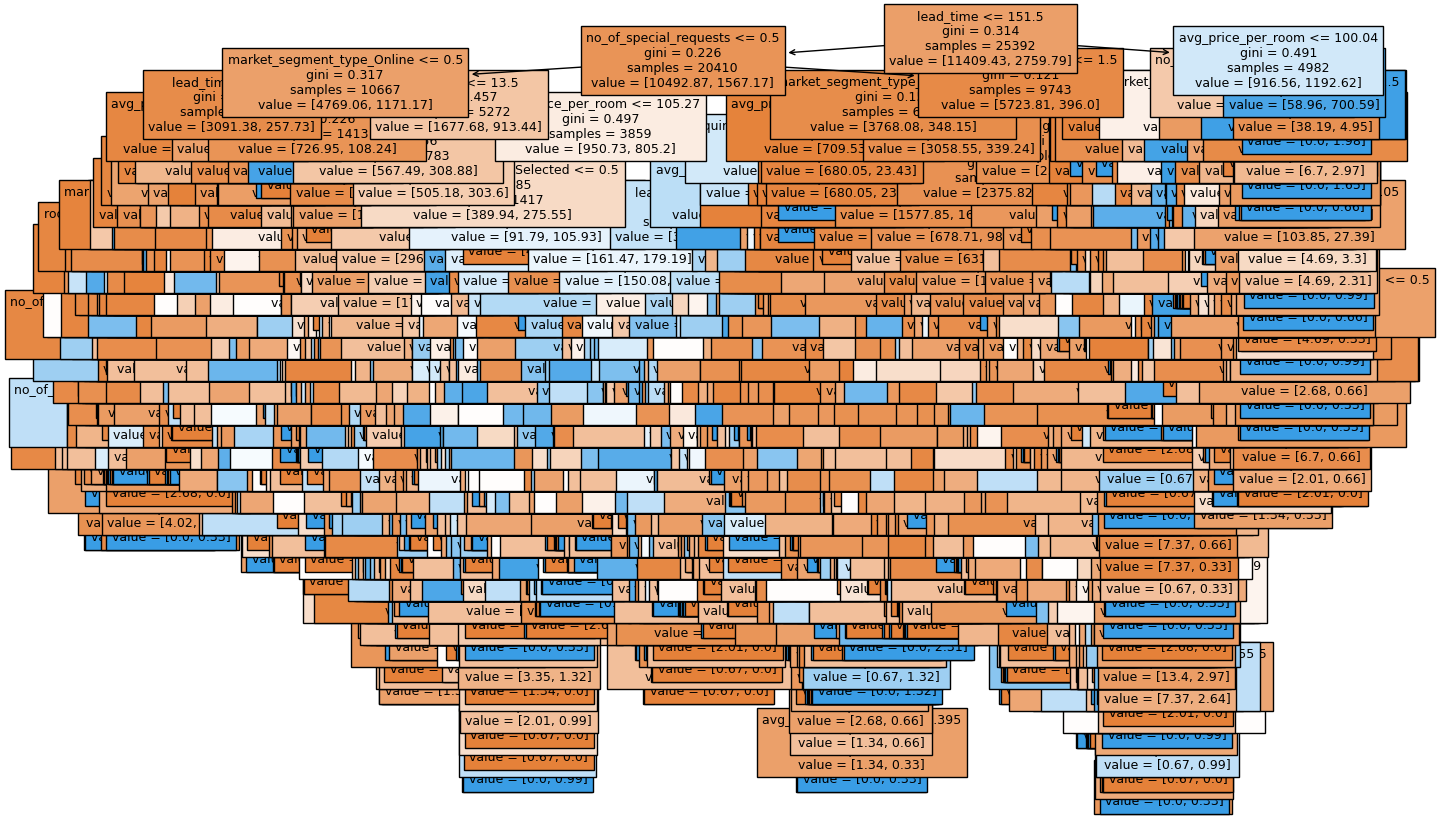

In [116]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [117]:
#as we can see this tree is very complex and not easy to understand or interpret

In [118]:
#Print the top-10 most important features in the decision tree 
#The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature

print(pd.DataFrame(estimator.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(
    by="Imp", ascending=False).head(n=10))

                                     Imp
lead_time                       0.344742
avg_price_per_room              0.215864
market_segment_type_Online      0.088261
arrival_date                    0.087987
arrival_month                   0.072068
total_nights                    0.056147
no_of_special_requests          0.053161
no_of_adults                    0.030049
arrival_year                    0.009617
type_of_meal_plan_Not Selected  0.008765


According to this pre-pruned decision tree model, lead_time and avg_price_per_room are still the two most important variables for predicting a booking's cancellation by a factor of 3 and 2, respectively, over the third most important variable, arrival_date.

#Now lets try post pruning or cost complexity pruning

inimal cost complexity pruning recursively finds the node with the "weakest link". The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. To get an idea of what values of ccp_alpha could be appropriate, scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [119]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.67, 1: 0.33})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [120]:
pd.DataFrame(path)


,ccp_alphas,impurities
0,0.000000e+00,0.005669
1,1.551420e-20,0.005669
2,1.551420e-20,0.005669
3,1.551420e-20,0.005669
4,1.551420e-20,0.005669
...,...,...
1497,6.372014e-03,0.212501
1498,8.645264e-03,0.221146
1499,1.156173e-02,0.244270
1500,2.134577e-02,0.265616


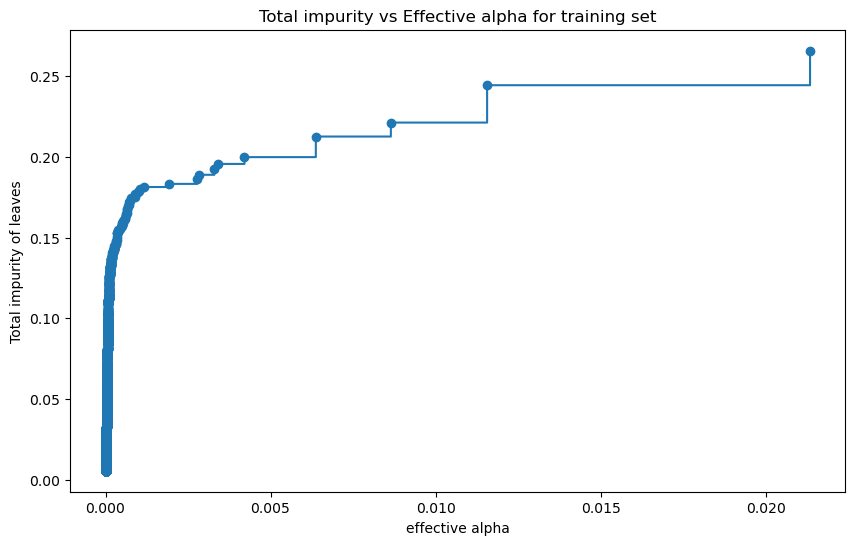

In [121]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("Total impurity of leaves")
ax.set_title("Total impurity vs Effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [122]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.67, 1: 0.33})
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))
#Number of nodes in the last tree is: 1 with ccp_alpha: 0.04805816398780094


Number of nodes in the last tree is: 1 with ccp_alpha: 0.048058163987799773


For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

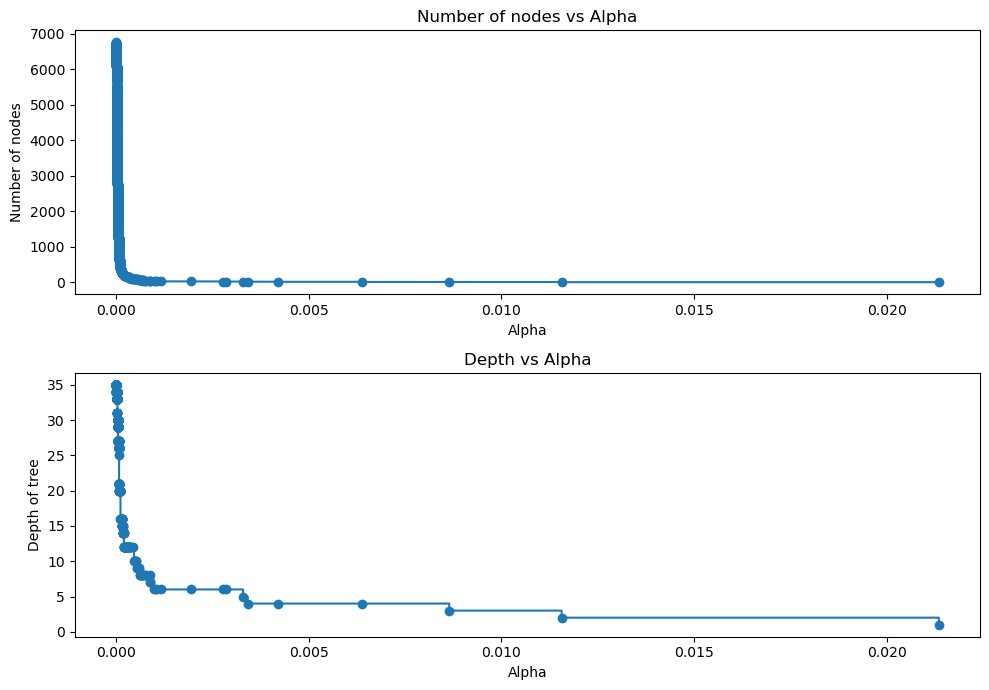

In [123]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs Alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs Alpha")
fig.tight_layout()

In [124]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

In [125]:
f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

In [126]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

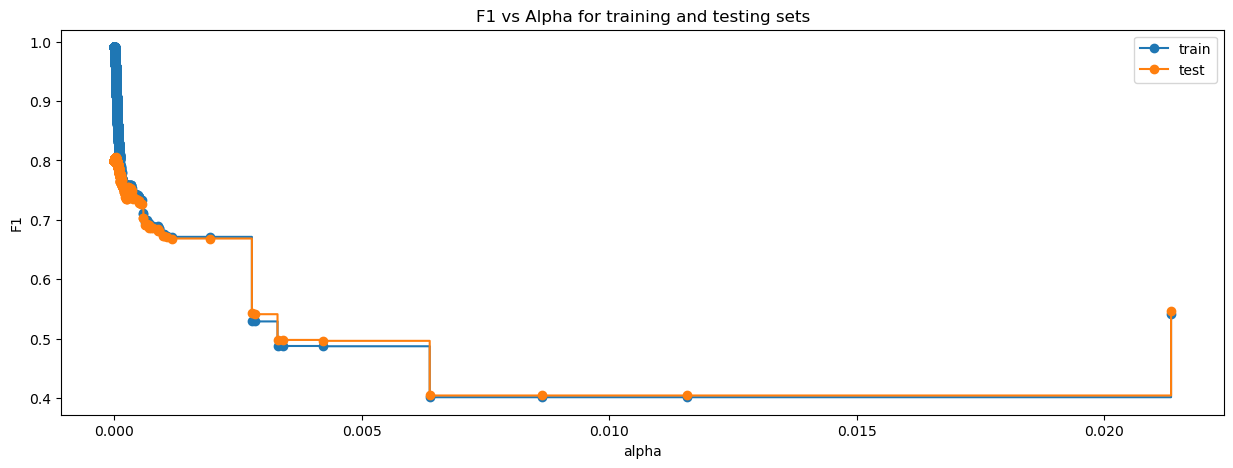

In [127]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1")
ax.set_title("F1 vs Alpha for training and testing sets")
ax.plot(
    ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [128]:
#create the model where we get highest train and test recall
index_post = np.argmax(f1_test)
dtree_post = clfs[index_post]
print(dtree_post)

DecisionTreeClassifier(ccp_alpha=2.7552408023538066e-05,
                       class_weight={0: 0.67, 1: 0.33}, random_state=1)


In [129]:
dtree_post.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=2.7552408023538066e-05,
                       class_weight={0: 0.67, 1: 0.33}, random_state=1)

Checking performance on training set


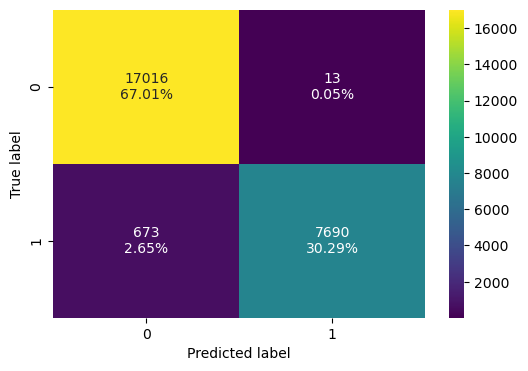

In [130]:
confusion_matrix_sklearn(dtree_post, X_train, y_train)


In [131]:
decision_tree_postpruned_perf_train = get_f1_score(dtree_post, X_train, y_train)
print("F1 Score:", decision_tree_postpruned_perf_train)

F1 Score: 0.9573011328270883


Checking performance on the test set


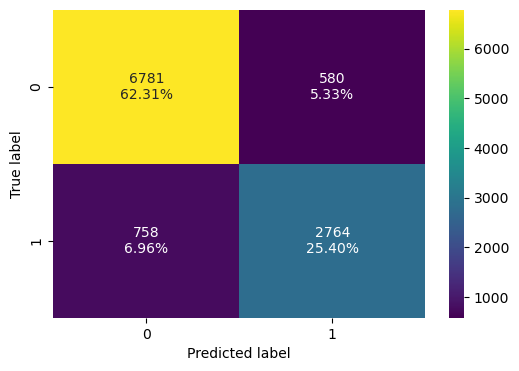

In [132]:
confusion_matrix_sklearn(dtree_post, X_test, y_test)


In [133]:
decision_tree_postpruned_perf_test = get_f1_score(dtree_post, X_test, y_test)
print("F1 Score:", decision_tree_postpruned_perf_test)

F1 Score: 0.8051267113311973


Visualizing the Decision Tree


In [134]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dtree_post, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- total_nights <= 5.50
|   |   |   |   |   |   |--- lead_time <= 74.50
|   |   |   |   |   |   |   |--- arrival_month <= 5.50
|   |   |   |   |   |   |   |   |--- arrival_date <= 27.50
|   |   |   |   |   |   |   |   |   |--- lead_time <= 59.50
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 12
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Offline >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [344.38, 3.63] class: 0
|   |   |   |   |   |   |   |   |   |--- lead_time >  59.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 138.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5


In [135]:
#The tree above is still complex and difficult to interpret.


In [136]:
#Print the top-10 most important features in the decision tree 
#The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature

print(pd.DataFrame(dtree_post.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(
    by="Imp", ascending=False).head(n=10))

                                     Imp
lead_time                       0.346383
avg_price_per_room              0.214847
market_segment_type_Online      0.088600
arrival_date                    0.087755
arrival_month                   0.071576
total_nights                    0.055039
no_of_special_requests          0.053365
no_of_adults                    0.030051
arrival_year                    0.010454
type_of_meal_plan_Not Selected  0.008723


According to this post-pruned decision tree model, lead_time and avg_price_per_room are still the two most important variables for predicting a booking's cancellation by a factor of 3.5 and 2, respectively, over the third most important variable, arrival_date.

GridSearch for hyperparameter tuning (Optimal depth)


Assume that INN Hotels requests a model which can be followed more easily than these complex models, thereby allowing them to justify its predictions in retrospect. Ideally, the decision-tree model should have a higher F1 score than the best logistic regression model (0.70), while providing a simpler tree.

In [137]:
# Choose the type of classifier.
easy_read = DecisionTreeClassifier(random_state=1, class_weight={0: 0.67, 1: 0.33})

# Grid of parameters to choose from
parameters = {
    "max_depth": [2,4,6,8],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(easy_read, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
easy_read = grid_obj.best_estimator_

# Fit the best algorithm to the data.
easy_read.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, max_depth=8,
                       min_impurity_decrease=1e-05, random_state=1)

In [138]:
#Visualizing the decision-tree


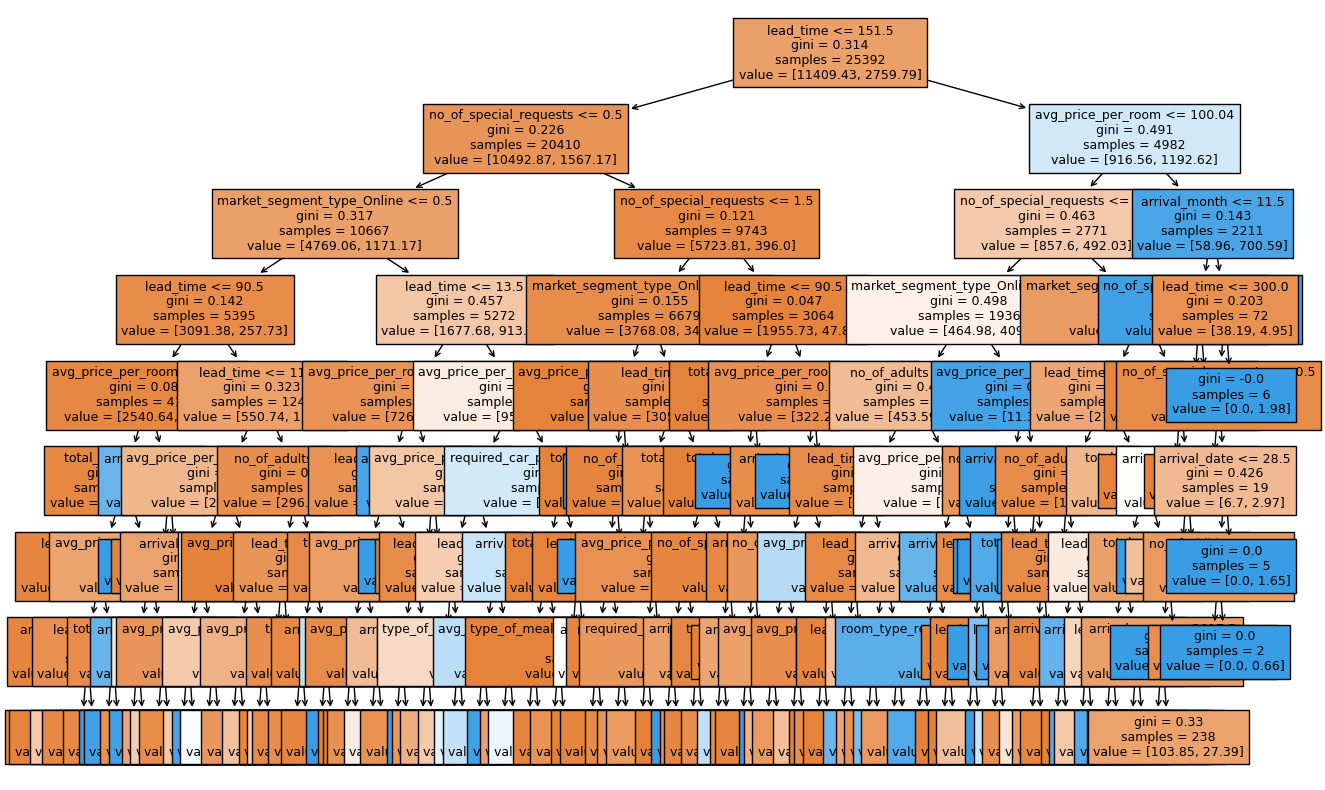

In [139]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    easy_read,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [140]:
#The tree looks better and easier to interpret

Checking performance on the training set


In [141]:
decision_tree_tune_perf_train_easy = get_f1_score(easy_read, X_train, y_train)
print("F1 Score:", decision_tree_tune_perf_train_easy)

F1 Score: 0.7473451937663771


Checking performance on the test set


In [142]:
decision_tree_tune_perf_test_easy = get_f1_score(easy_read, X_test, y_test)
print("F1 Score:", decision_tree_tune_perf_test_easy)

F1 Score: 0.7379941195687684


The model has a better F1 score on both the training and testing datasets than the logistic regression models.
Additionally, this simpler model appears to perform similarly well on both the training and test dataset, indicating that this model is not overfit to the training data and thereby should provide more generalizable predictions.

Feature importance


In [143]:
#Print the top-10 most important features in the decision tree 
#The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature

print(pd.DataFrame(easy_read.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(
    by="Imp", ascending=False).head(n=10))

                                     Imp
lead_time                       0.410229
avg_price_per_room              0.219261
market_segment_type_Online      0.154175
no_of_special_requests          0.091943
arrival_month                   0.049457
no_of_adults                    0.026418
total_nights                    0.019178
arrival_date                    0.009471
required_car_parking_space      0.008610
type_of_meal_plan_Not Selected  0.003770


#According to this less complex decision tree model, lead_time and avg_price_per_room are again the two most important variables, while market_segment_type_Online has also increased in importance over previous trees.

## Conclusions
We analyzed the cancelation decisions of 36,275 bookings through four different Decision Tree classifiers to create a predictive model for the same. These models can be used by INN Hotels Group to predict if a booking will be canceled prior to the check-in date.
All four of the decision-tree models perform better, via our objective criterion of F1 score, than best-performing logistic regression model.
We visualized each model's decision-tree and confusion matrix to get a better understanding of each model. However, the predictions from the original, pre-pruned, and post-pruned decision-tree model would be difficult to interpret by the client. For example, observe the substantial complexity of the pre-pruned decision-tree in its visualization above.
Despite our efforts to tune the decision-tree model in order to reduce overfitting, both pre-pruning and post-pruning methods resulted in minimal reductions to overfitting. However, the best performing model, the pre-pruned decision-tree, still shows a significant disparity between its performance on the training dataset and the test dataset. This indicates that this model's predictions, as compared to the best logistic regression model, may not be as generalizable.
INN Hotels should consider the tradeoff that exists for these decision-tree models with respect to performance, overfitting, and understanding the decision-making criteria of the model.
If a more understandable prediction model is the objective, then the minimal depth required for this decision-tree model to perform better than the best logistic regression model, is 8. However, if the tree above is still too complex for the client's use-case and preferences, than potentially the logistic regression model is the ideal prediction tool.
Alternatively, if INN Hotels is seeking the best performing prediction model and is also comfortable with these predictions originating from a "black-box" model, then the pre-pruned tree provides that.
Across all four models, lead_time and avg_price_per_room were the two most important variables for predicting a booking's cancellation.

## Actionable Insights 
Our EDA and predictions from both models show that guests booking cheaper rooms, with shorter lead times, requiring a parking space, being a repeat guest, with higher number of special requests, from the Corporate and Offline market segments are less likely to cancel bookings. Conversely, guests booking more expensive rooms, with longer lead times, through the Online market segment are more likely to cancel bookings.
What profitable policies for cancellations and refunds can the hotel adopt?

Based on the coefficients in the logistic regression models and the features in the decision-tree models, both prediction models provide evidence that INN Hotels should at least consider separate cancellation and refund policies for its guests travelling for business or personal reasons.
Therefore, the data suggests that introducing a rewards program for business travelers (e.g., requiring more frequent trips, booking on short notice from a corporate sales channel, and directed by corporate travel guidelines to book a room with the lowest available cost) should further incentive these guests to book at INN Hotels and follow-through on their travel plans.
Additionally, in case a hotel is at capacity or overbooked, management could utilize the model to ensure all repeat guests or guests travelling for business reasons have rooms available. Conversely, management can combine predictions from both models to identify the "most likely case" that a booking will be canceled and reallocate that room to a booking for that room category which is the "least likely case".
We offer a disclaimer that this model should not replace the industry experience of its management team regarding managing its hotel's capacity. Rather, these models can provide supplemental evidence in support of its decision-making process.


## Recommedations

To further improve the utility of the models, the hotel can provide approximations of the costs related to the outcomes corresponding to true/false positives/negatives. Our team can then optimize the models predicitions to achieve the highest expected profits, versus optimizing for F1 score, which we chose for our evaluation criteria based on the client's use-case.